In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
import seaborn as sns

In [2]:
df_read = pd.read_csv('Credit_Card_Applications.csv')

In [4]:
df_read.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [5]:
X = df_read.drop(['CustomerID', 'Class'], axis=1)

In [6]:
y = df_read['Class']

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
sc = MinMaxScaler()

In [9]:
X_sc = sc.fit_transform(X)

In [11]:
X_scaled = pd.DataFrame(X_sc, columns=X.columns)

In [12]:
X_scaled.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158


In [16]:
from minisom import MiniSom

In [18]:
som = MiniSom(12, 12, input_len= 14)

In [19]:
som.random_weights_init(X_sc)

In [94]:
som.train_random(X_sc, num_iteration=100)

One way to plot the map:
* fig = plt.figure()
* axes = fig.add_axes([0,0,1,1])
* my_plot = axes.matshow(som.distance_map().T, cmap='viridis', interpolation='none')
* plt.colorbar(my_plot)
However, we can use a heatmap

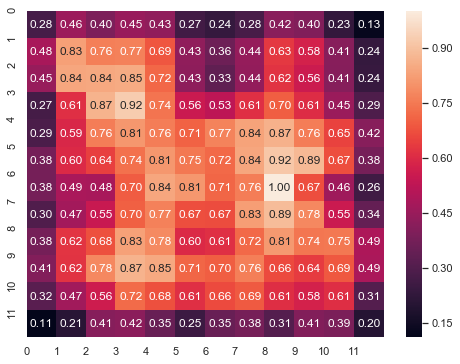

In [203]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(som.distance_map(), annot=True, fmt='.2f')
ax.set_yticks(range(13))
ax.set_xticks(range(13))

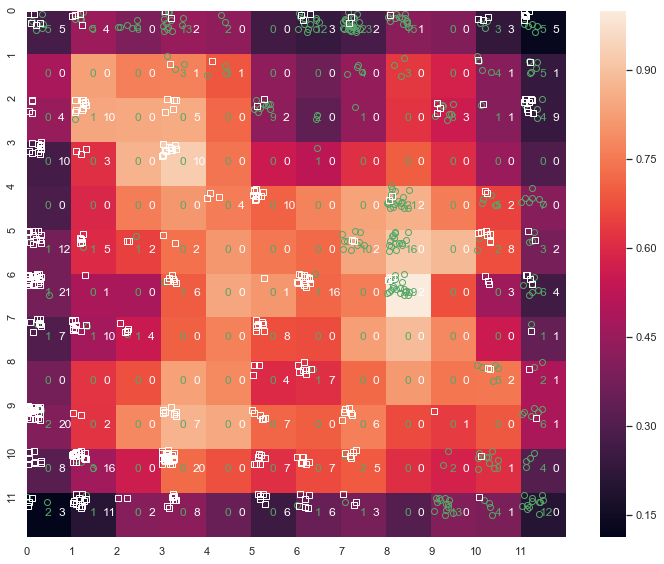

In [204]:
plt.figure(figsize=(10,8))
for i in range(12):
    for j in range(12):
        try:
            n_1 = som.labels_map(X_sc, y)[(i, j)][1]
        except: n_1 = 0
        try:
            n_0 = som.labels_map(X_sc, y)[(i, j)][0]
        except: n_0 = 0
        plt.text(i+0.4,j+0.5, str(n_1), color='g')
        plt.text(i+0.7,j+0.5, str(n_0), color='w')
        for n in range(n_1):
            plt.plot(i+np.random.rand()/2,j+np.random.rand()/2, marker='o', color='g', markerfacecolor='None')
        for n in range(n_0):
            plt.plot(i+np.random.rand()/3,j+np.random.rand()/3, marker='s', color='w', markerfacecolor='None')
        
ax = sns.heatmap(som.distance_map(), fmt='.2f')     
ax.set_xticks(range(13))
ax.set_yticks(range(13))
plt.tight_layout()